> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.:

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

 ##Questions ::
 
1 : we are looking for the relation between ( Gender , Age , Scholarship , Hipertension , Diabetes , Alcoholism , Handcap ) and Show ?

2 ( Who's go to hospital more male or female in percentage? )

3 (Did sms-reminders increase the proportion of patients showing up the medical appointment ?)

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [94]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [96]:
df.shape

(110527, 14)

In [97]:
df.duplicated().sum()

0

In [98]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning ::

<li> The data has 14 colums and 110527 rows with no duplicates.
<li> There is no missing values, since each column has 110527 values.
<li> The columns( PatiendID and AppointmentID ) don't seem helpful and will be dropped.
<li> Min value of Age column = -1 and seem to be odd number and need to excluded.
<li>remove useless columns ( 'PatientId','AppointmentID').
<li>rename the columns to use easier names during the exploration as (no-show)to(no_show).

In [99]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [100]:
df.rename(columns= lambda x: x.lower(),inplace=True)
df.rename(columns={'no-show':'no_show'},inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'],
      dtype='object')

In [101]:
#From the first handling of the dataset, we find that there is a '-1' value present in the column age
df.loc[df['age'] == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [102]:
# We can delete that row.
df.drop([99832], inplace=True)

In [103]:
#the column Handcap has not been dichotomous, detailed inspection is needed :

df['handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110526 non-null  object
 1   scheduledday    110526 non-null  object
 2   appointmentday  110526 non-null  object
 3   age             110526 non-null  int64 
 4   neighbourhood   110526 non-null  object
 5   scholarship     110526 non-null  int64 
 6   hipertension    110526 non-null  int64 
 7   diabetes        110526 non-null  int64 
 8   alcoholism      110526 non-null  int64 
 9   handcap         110526 non-null  int64 
 10  sms_received    110526 non-null  int64 
 11  no_show         110526 non-null  object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [105]:
#From previous info, we saw the column no_show is dichotomous, in 'object' type instead of boolean,
# we will convert to type boolean '1' and '0' instead of 'No' and 'Yes' as values will be needed.
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

In [106]:
# now see how our data looks like after cleanning ends
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [107]:
#we can save the cleaned dataframe to another .csv-file. to continue with the explorative analysis.
df.to_csv('noshowappointments-May-2016-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

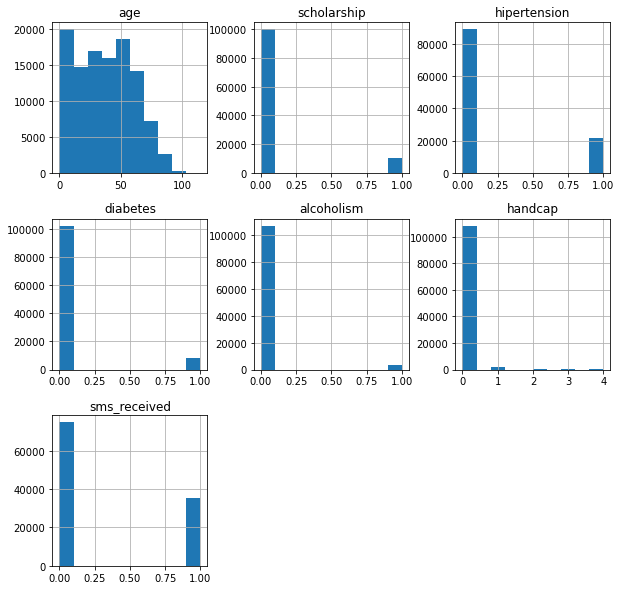

In [108]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Take general look on our data
#plot basic histogram charts ( to take general look ):
df.hist(figsize=(10,10));

We use hist() function to get histogram analysis for all columns that is numirical.

# First we need to know ratio of ( Show : no_show ):

In [109]:
# divide data into two sets of data: one for people who showed up and the second for people who didn't show up ,
show= df.no_show == "Yes"
no_show= df.no_show == "No"

In [110]:
df[no_show].count()

gender            88207
scheduledday      88207
appointmentday    88207
age               88207
neighbourhood     88207
scholarship       88207
hipertension      88207
diabetes          88207
alcoholism        88207
handcap           88207
sms_received      88207
no_show           88207
dtype: int64

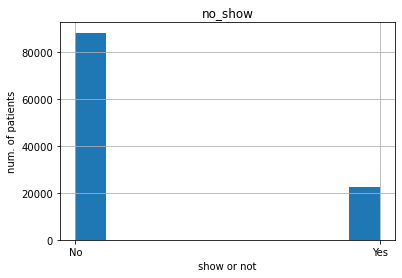

In [111]:
#Plot histogram of no_show column

df['no_show'].hist()
plt.title('no_show')
plt.xlabel('show or not')
plt.ylabel('num. of patients');

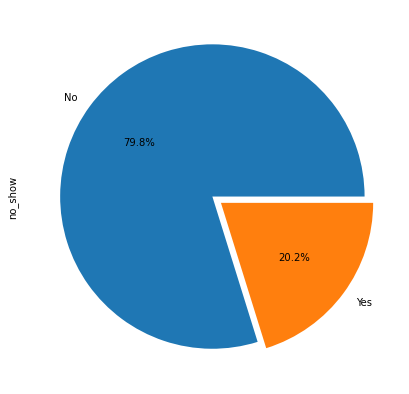

In [112]:
#Plot the proportion of no_shows as a piechart.

df.no_show.value_counts().plot.pie(figsize=(7,7), autopct='%.1f%%', explode=(0,0.07))
plt.show()

## Research Question 1 : we are looking for  the relation between ( Gender , Age , Scholarship , Hipertension , Diabetes , Alcoholism , Handcap ) and Show ?

<li>first we make a function to prevent repeatition of code :

In [113]:
# Function for ploting histogram relationship between 2 columns.

def plothist(col1,col2,col_name):
    plt.figure(figsize=[8,8])
    col1.hist(alpha=1 , label = 'show')
    col2.hist(alpha=0.2,label='no_show')
    plt.legend()
    plt.title('Comparison between those who attend the appointment and those who did not according to thier ' + col_name)
    plt.xlabel(col_name)
    plt.ylabel('num. of Patient')
    
# Function to translate the Histogram into numbers.

def transplot(col):
    return df.groupby(col).no_show.value_counts()

### 1) Gender ( f or m ) and show :

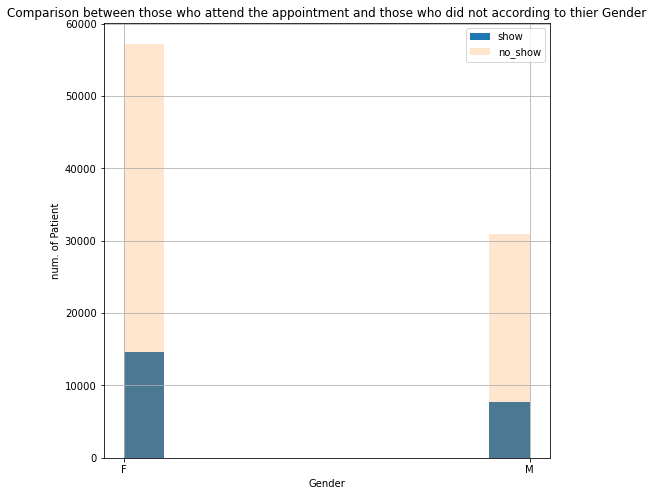

In [114]:
plothist(df.gender[show],df.gender[no_show],'Gender')

<li> Gender not affect on show .

<li> Number of females who didn't show is greater than number of males who didn't show .

<li> Number of females who did show is more than number of males who did show.

### 2) Age and show : 

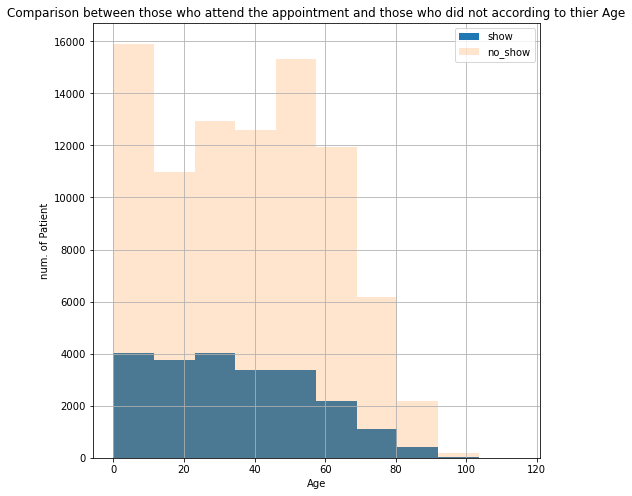

In [115]:
# Compare between show and no_show according to the Age.

plothist(df.age[show],df.age[no_show],'Age')


In [116]:
# convert the histogram to numbers to figure relation between data and analysis .

transplot('age')

age  no_show
0    No         2900
     Yes         639
1    No         1858
     Yes         415
2    No         1366
                ... 
99   No            1
100  No            4
102  No            2
115  Yes           3
     No            2
Name: no_show, Length: 203, dtype: int64

<li> Older patients are less to attend appointements .

<li> Age from  ( 10 to 35 Y ) approximately have high percentage % of attending appointements .

<li> Age from ( 56 to 75 Y ) approximately have lower percentage % of attending appointements .

<li> So,we should focus more on older patients to increace their percentage of attendence.

### 3) Scholarship and show :

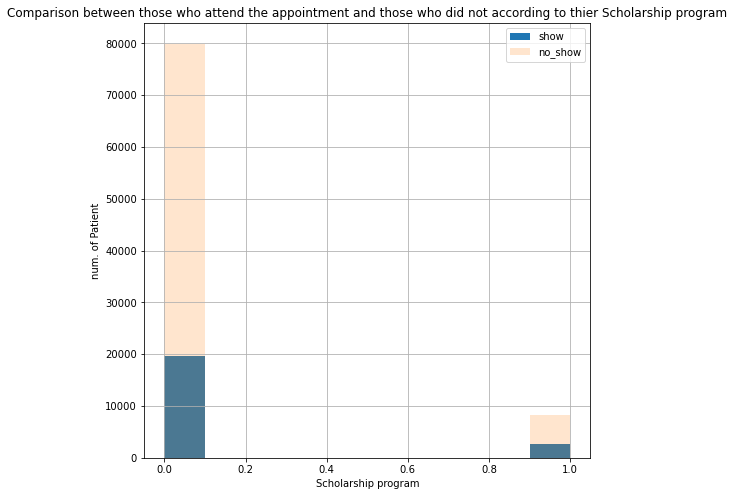

In [117]:
# Compare between show and no_show according to having the Scholarship.

plothist(df.scholarship[show],df.scholarship[no_show],'Scholarship program')

In [118]:
# convert the histogram to numbers to figure relation between data and analysis .

transplot('scholarship')

scholarship  no_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

<li> Subscribe in scholarship is not affect attendance the appointment as we see in histogram that number of patients who did not suscribe is more than who suscribe .

### 4) Hipertension and show :

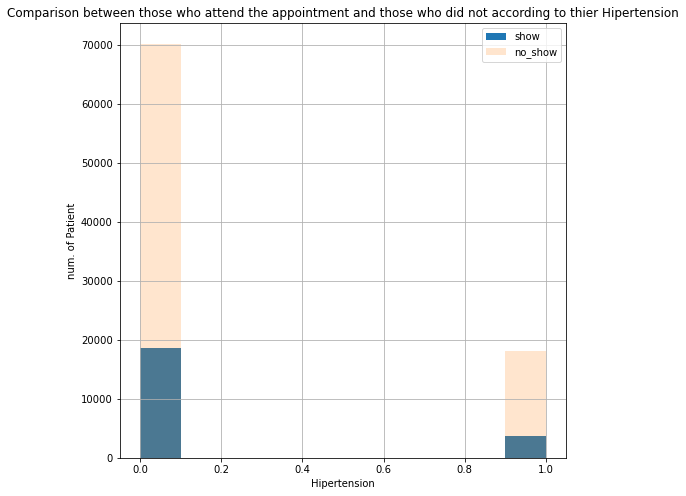

In [119]:
# Compare between show and no_show according to hipertension.

plothist(df.hipertension[show],df.hipertension[no_show],'Hipertension')


In [120]:
# convert the histogram to numbers to figure relation between data and analysis .

transplot('hipertension')

hipertension  no_show
0             No         70178
              Yes        18547
1             No         18029
              Yes         3772
Name: no_show, dtype: int64

<li> Hipertension is not affect attendance as we see that the percentage of people who haven't hipertension and show is greater than who have not show .

### 5) Diabetes and show :

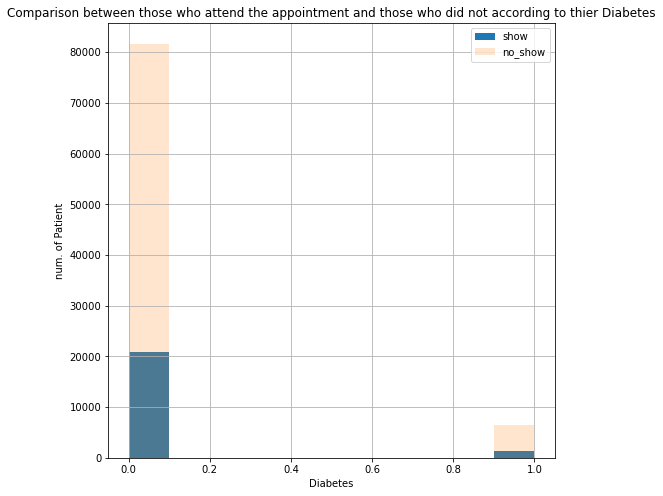

In [121]:
# Compare between show and no_show according to diabetes.

plothist(df.diabetes[show],df.diabetes[no_show],'Diabetes')

In [122]:
# convert the histogram to numbers to figure relation between data and analysis .

transplot('diabetes')

diabetes  no_show
0         No         81694
          Yes        20889
1         No          6513
          Yes         1430
Name: no_show, dtype: int64

<li> Diabetes also is not affect attendance as we see that the percentage of people who haven't diabetes and show is greater than who have not show .

### 6) Alcoholism and show :

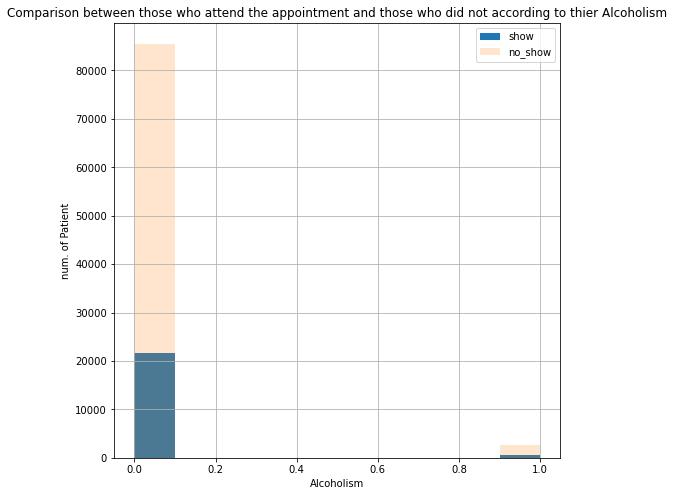

In [123]:
# Compare between show and no_show according to alcholism.

plothist(df.alcoholism[show],df.alcoholism[no_show],'Alcoholism')

In [124]:
# convert the histogram to numbers to figure relation between data and analysis .

transplot('alcoholism')

alcoholism  no_show
0           No         85524
            Yes        21642
1           No          2683
            Yes          677
Name: no_show, dtype: int64

<li> Alcoholism also is not affect attendance as we see that the percentage of people who haven't alcoholism and show is greater than who have not show .

### 7) Handcap and show :

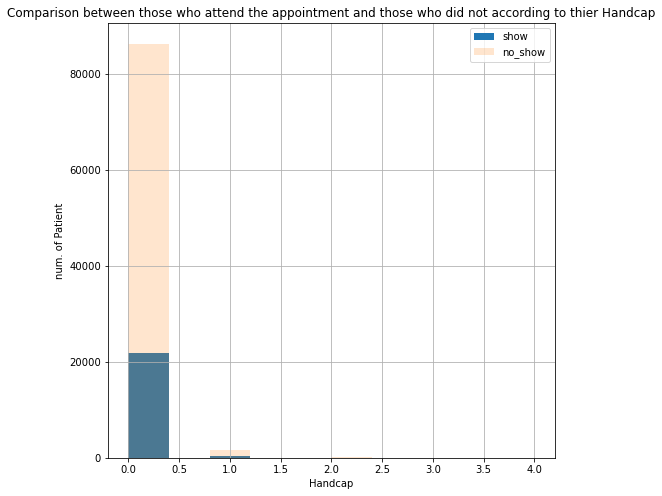

In [139]:
# Compare between show and no_show according to handcap.

plothist(df.handcap[show],df.handcap[no_show],'Handcap')

In [126]:
# convert the histogram to numbers to figure relation between data and analysis .

transplot('handcap')

handcap  no_show
0        No         86373
         Yes        21912
1        No          1676
         Yes          366
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: no_show, dtype: int64

<li> We conclude that also handcap is not affect attendance .

## Research Question 2 ( Who's go to hospital more male or female in percentage? )

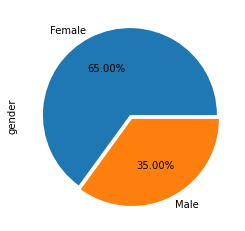

In [134]:
sex = ['Female', 'Male']
df['gender'].value_counts().plot.pie(labels = sex, autopct='%1.2f%%',explode=(0,.05));

<li> The answer is female with 65%

## Research Question 3  (Did sms-reminders increase the proportion of patients showing up the medical appointment ?)

<li> We need to build separate dataframes. One including the patients who received an sms-reminder and one with patients who did not receive an sms-reminder. 

after that we can analyze the proportions of no_shows within each dataframe.

In [135]:
df_sms_received = df[(df['sms_received'] == True)]
df_no_sms_received = df[(df['sms_received'] == False)]

#Group by no_show to calculate the amounts for each dataframe.
sms_received = df_sms_received.groupby(['no_show']).sum()['sms_received']

# As group function in combination with boolean values only works with "True" values so, we need to invert 
# the column sms_received in this case.
df_no_sms_received.rename(columns={"sms_received":"sms_not_received"}, inplace=True)
df_no_sms_received['sms_not_received'].replace({False: True}, inplace = True)                                                 

no_sms_received = df_no_sms_received.groupby(['no_show']).sum()['sms_not_received']

C:\Users\Laptop world\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Laptop world\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [136]:
# Check the value distribution of the groupings with the total amount of appointments of the dataset.

print(sms_received)
print('\n')
print(no_sms_received)
print('\n')

no_show
No     25698
Yes     9784
Name: sms_received, dtype: int64


no_show
No     0
Yes    0
Name: sms_not_received, dtype: int64




In [137]:
print(df['appointmentday'].count() == sum(sms_received) + sum(no_sms_received))

False


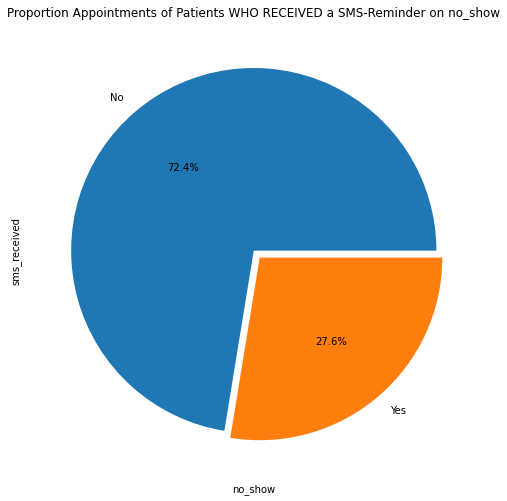

In [138]:
# everything looks correct, we can now calculate the proportions and visualize them.
sms_received = sms_received / sum(sms_received) * 100
no_sms_received = no_sms_received / sum(no_sms_received) * 100

# plot the graphs
fig = plt.figure(figsize=(18,20))

plt.subplot(2,2,1)
sms_received.plot.pie(autopct='%0.1f%%',explode=(0,.05))
plt.title('Proportion Appointments of Patients WHO RECEIVED a SMS-Reminder on no_show')
plt.xlabel('no_show');

<li> The group who received a sms-reminder did not show up more often compared to those who did not receive a sms-reminder.

<a id='conclusions'></a>
## Conclusions

<li> My analysis concloude that patients without any diseases in the dataset stated diseases have higher no_show rates compared to those having a disease. and so, it does not make much difference, which disease (hypertension, diabetes, alcoholism or handcap) the patient has.

<li> Also,female gender has the largest proportion of attendence the medical appointment .

<li> Most amazing is the fact that the sms-reminders for appointments within this dataset the patients of their upcoming appointment made things bad and not show up.

<li> We had deduced that if we send SMS to all patient we will increace the percentage of the attendence.

<a id='Limitations'></a>
## Limitations

<li> There was no explain of how the data collected,and if it was collected in a way that make these analysis trusted.

<li> There is only 9 columns to study and is not efficient to give good analysis and results.

<li> We need more columns and variables to study.